# PV Mismatch Simulation

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from pv_system import create_system
from mismatch_models import shade_modules, remove_modules

### Example 1: Basic system

Pmp: 139533.83415132738  Vmp: 787.6286350945819  Imp: 177.15688324939018


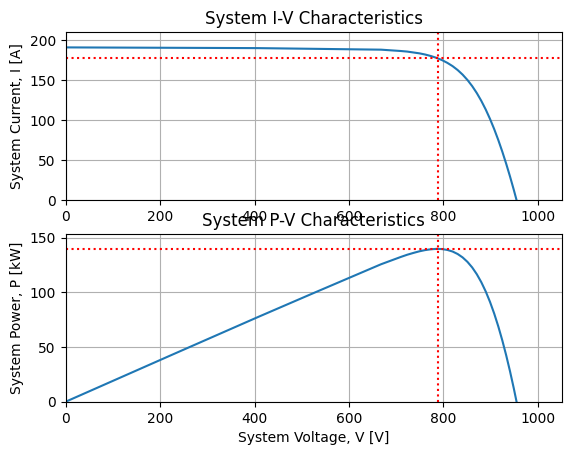

In [27]:
pvsys = create_system()
print("Pmp:", pvsys.Pmp, " Vmp:", pvsys.Vmp, " Imp:", pvsys.Imp)
ex1 = pvsys.plotSys()

### Example 2: Single module shading

Pmp after shading: 139152.53908254876
Imp after shading: 177.2115278960844
Vmp after shading: 785.2341251983722


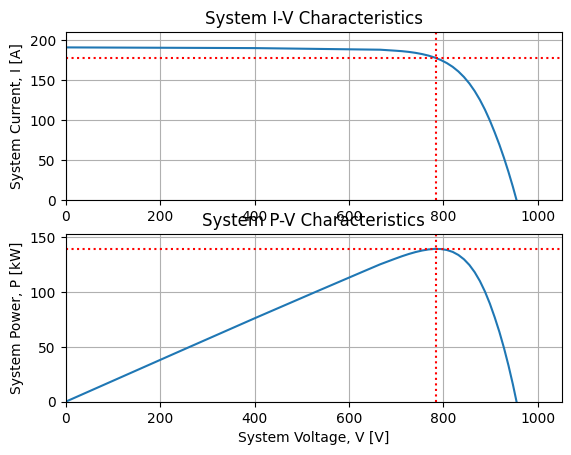

In [28]:
pvsys = create_system()
shade_modules(pvsys, {0: {0: 0.01}})
print("Pmp after shading:", pvsys.Pmp)
print("Imp after shading:", pvsys.Imp)
print("Vmp after shading:", pvsys.Vmp)
ex2 = pvsys.plotSys()

### Example 3: Partial shading & heating

Pmp after partial shading & heating: 135822.52228351435
Imp after partial shading & heating: 175.41173571092526
Vmp after partial shading & heating: 774.3069283992886


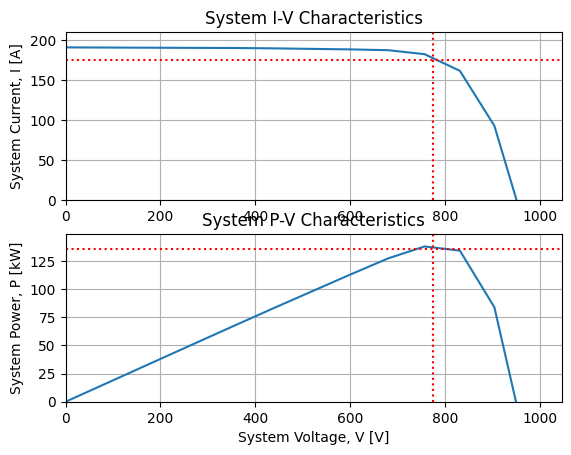

In [29]:
pvsys = create_system()
shade_modules(pvsys, {0: {0: [(0.2,)*8, (0,1,2,3,4,5,6,7)]}})
pvsys.setTemps({0:{0:[(100.0+273.15,)*8, (0,1,2,3,4,5,6,7)]}})
print("Pmp after partial shading & heating:", pvsys.Pmp)
print("Imp after partial shading & heating:", pvsys.Imp)
print("Vmp after partial shading & heating:", pvsys.Vmp)
ex3 = pvsys.plotSys()

### Example 4: Module removal

Module equivalent loss: 16.295164996505843
Pmp after module removal: 63742.939148295314
Imp after module removal: 177.3064252198471
Vmp after module removal: 359.5072150896883


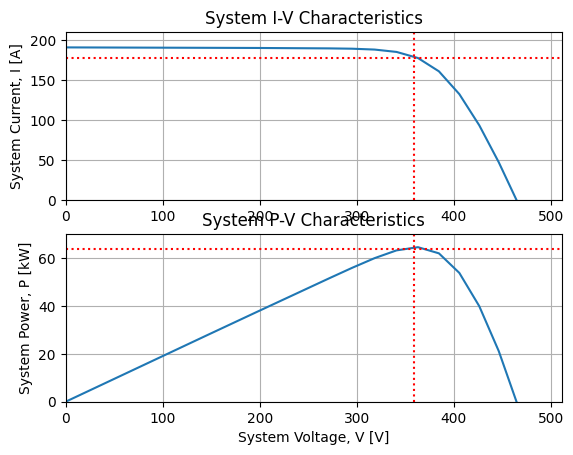

In [31]:
pvsys = create_system()
pvsys_degraded = remove_modules(pvsys, n_missing=12, strings_with_missing=10)
module_eq_diff = (pvsys.Pmp - pvsys_degraded.Pmp) / (pvsys.Pmp/len(pvsys.numberMods))
print("Module equivalent loss:", module_eq_diff)
print("Pmp after module removal:", pvsys_degraded.Pmp)
print("Imp after module removal:", pvsys_degraded.Imp)
print("Vmp after module removal:", pvsys_degraded.Vmp)
ex4 = pvsys_degraded.plotSys()

### Example 5: Loop over number of strings

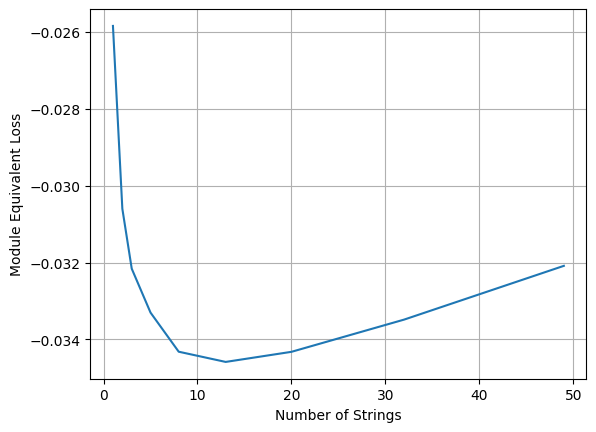

In [23]:
num_strings_list = np.unique(np.logspace(0, np.log10(50), num=10, dtype=int))
module_eq_diff_list = []

for num_strings in num_strings_list:
    sys = create_system(num_strings=num_strings)
    shade_modules(sys, {0:{0:0.9}})
    diff = (sys.Pmp - create_system(num_strings=num_strings).Pmp)/(sys.Pmp/len(sys.numberMods))
    module_eq_diff_list.append(diff)

plt.figure()
plt.plot(num_strings_list, module_eq_diff_list)
plt.xlabel("Number of Strings")
plt.ylabel("Module Equivalent Loss")
plt.grid()